__David Sivieri__  
__CSC8200 Health Informatics & EHealth Systems__  
__Final Project__  
__Feb 24, 2020__

# Project Description and Goal

Predicting which patients will be readmitted to a hospital within 30 days has become a priority in the medical community.  The goal of this project is to examine a dataset of diabetic patient encounters and attempt to use machine learning algorithms to predict which patients will be readmitted within 30 days after discharge.

# Purpose of Project

The authors that originally assembled the database I am using (Strack et al.) were motivated by the recognition that the management of hyperglycemia in a hospital patients has a significant impact on patient outcomes.  ICU settings generally have developed rigorous and formal protocols for managing hyperglycemia and have well defined glucose targets.  However, the authors state that there is evidence that non-ICU inpatient management of hyperglycemia does not have as rigorous protocols.  This can lead to either no treatment or wide fluctuations in patient glucose levels.[1]  
  
There is some evidence from controlled trials that having non-ICU inpatient hyperglycemia management protocols can be effective[1].  However, there was a lack of national studies and the authors wanted to see if there was evidence that having rigorous hyperglycemia protocols in inpatient settings reduced readmissions.  Therefore, the authors assembled a national database of diabetes patient encounters.  Their goal, in particular, was to examine how hospitals were monitoring HbA1c.  They viewed this as a mark of how much attention was paid to diabetes care.  The original study's hypothesis was that the decision alone to measure HbA1c was associated with a reduction in readmission rates.  The authors ultimately came to the conclusion that the decision to measure the HbA1c of a hospital patient was a useful predictor of readmission rates[1].

Subsequent work done on this same dataset (see Usman et al.) has looked at the dataset in broader terms as a machine learning problem prediction/classification problem.  My goal for this project is to take this same database and first provide an exploratory look at it through plot and tables, while pointing out interesting correlations.  I will then take it through a pre-processing phase.  Finally, I will apply machine learning algorithms (decisions trees and random forrest) to the database and attempt to predict which category each patient in the testing set falls into.  

The original database has 3 categories for the target feature "readmitted": "<30", ">30", and "NO."  These correspond to "readmitted in less than 30 days", "readmitted in greater than 30 days", and "not readmitted."  The convention in previous ML studies (which I follow as well) has been to code "<30" as a "1" and both ">30" and "NO." as a "0".  Most studies seem interested mainly in predicting where the patient falls into the "<30" or not category.

## Structure of Project

My project is in the form of Jupyter Notebooks and is in 3 parts.  The first part (this Notebook) is called "hospital_readmissions_exploration.ipynb" and covers data exploration.  The second part ("hospital_readmissions_preprocessing.ipynb") covers pre-processing and the third part ("hospital_readmissions_predicting.ipynb") covers modeling.  I will annotate important blocks of code with narrative text to explain results in each of these notebooks.



# Dataset Description

The dataset in use was sourced from the Health Facts database (Cerner Corporation, Kansas City, MO.)  This is a warehouse of clinical records from hospitals in the United States. The data comes from the hospital's electronic medical records database and has these characteristics:  

- Represents 10 years (1999 - 2008)
- 130 U.S. hospitals used
- Bed size of most hospital: 100 - 499 beds
- Entire raw database has 74,036,643 unique encounters
- Entire raw database has 17,880,231 unique patients
- Entire raw database has 2,889,571 providers

The database actually in use for this study was extracted from the above larger database based on these criteria:  

- Inpatient encounter
- Some form of diabetes was entered as a the diagnosis
- Length of stay - 1 to 14 days
- Lab tests were performed
- Medications were given

Final database has 101,766 encounters and 71,518 unique patients[1]

# References

Inside this block, I will indicate the sources used for this work.  Source [4] is a link to the actual database.  The other sources are works that have studied this same database.  I will refer to these sources throughout this notebook using the bracket [] notation.

[1] Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore. "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records." *BioMed Research International* vol. 2014. Article ID 781670, 2014, https://www.hindawi.com/journals/bmri/2014/781670/ Accessed 23 Feb 2020.  
  
  
[2] Raza, Usman. "How to use machine learning to predict hospital readmissions?" *Berkley School of Information* 2018, https://medium.com/berkeleyischool/how-to-use-machine-learning-to-predict-hospital-readmissions-part-1-bd137cbdba07 Accessed 23 Feb 2020. 
  
  
[3] Lin, Singh, Kar, and Usman Raza. "What are Predictors of Medication Change and Hospital Readmission in Diabetic Patients?" *Berkley School of Information* 2017, https://www.ischool.berkeley.edu/projects/2017/what-are-predictors-medication-change-and-hospital-readmission-diabetic-patients Accessed 23 Feb 2020.  
  
[4] "Diabetes 130-US hospitals for years 1999-2008 Data Set" *UCI Machine Learning Repository* https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008# Accessed 23 Feb 2020.  



## Description of all Dataset Fields:

The table following this block contains a description of every field in this dataset.

In [1]:
import pandas as pd

df_col_descr = pd.read_csv("col_name_descr.csv", header=0, index_col=["Feature name"])
df_col_descr

,Type,Description and values,% missing
Feature name,,,
Encounter ID,Numeric,Unique identifier of an encounter,0%
Patient number,Numeric,Unique identifier of a patient,0%
Race,Nominal,"Values: Caucasian, Asian, African American, Hi...",2%
Gender,Nominal,"Values: male, female, and unknown/invalid",0%
Age,Nominal,"Grouped in 10-year intervals: 0, 10), 10, 20),...",0%
Weight,Numeric,Weight in pounds.,97%
Admission type,Nominal,Integer identifier corresponding to 9 distinct...,0%
Discharge disposition,Nominal,Integer identifier corresponding to 29 distinc...,0%
Admission source,Nominal,Integer identifier corresponding to 21 distinc...,0%


# The code block below contains dependencies needed for the project:

In [2]:
import re
import math
import sys
import numpy as np


from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from sklearn.model_selection import RepeatedKFold
import scipy
import sklearn

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option("display.max_rows", 1000000)
pd.set_option("display.max_columns", 1000000)
pd.set_option("display.width", 1000000)
pd.set_option("display.max_colwidth", 1000000)
pd.set_option("display.max_info_columns", 1000)
np.set_printoptions(threshold=sys.maxsize)

from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 1px solid lightgray;
    }
    tr:nth-child(even) {
        background: #eee;
    }
    th {
       background-color: lemonchiffon;
       color: black;
}
</style>

# This block is used to load the dataset and it performs some pre-processing:

In [4]:
# df = pd.read_csv("diabetic_data.csv", header=0, index_col=["patient_nbr", "encounter_id"])

# df["readmitted_less_30"] = (df.readmitted == "<30").astype('int')

# for col_name in df.select_dtypes(include="int64").columns:
#     df[col_name] = pd.to_numeric(df[col_name], downcast="integer")

# left_age = df.age.str.extract(pat=r"^\[([0-9]+)").astype("int")
# right_age = df.age.str.extract(pat=r"([0-9]+)\)$").astype("int")

# df["imputed_age"] = (right_age - left_age) / 2 + left_age
# df["imputed_age"] = pd.to_numeric(df["imputed_age"], downcast="integer")


# df.sort_values(by=["patient_nbr", "encounter_id"], inplace=True)

# df.to_pickle("diabetic_data.pkl")

# This block shows the first 50 lines of the dataset:

In [5]:
df = pd.read_pickle("diabetic_data.pkl")
df.head(50)

race  gender      age   weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital payer_code                medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses max_glu_serum A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted  readmitted_less_30  imputed_age
patient_nbr encounter_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
135         24437208            Caucasian  Female  [50-60)        ?                  2                         1                    1                 8          ?                       Cardiology                  77               6               33                  0                 0                 0     401     997     560                 8          None      None    Steady          No          No             No          No            No        No      Down          No           No            No       No       No           No         No      No          No  Steady                  No                  No                       No                      No                     No     Ch         Yes        <30                   1           55
            26264286            Caucasian  Female  [50-60)        ?                  1                         1                    7                 3          ?  Surgery-Cardiovascular/Thoracic                  31               1               14                  0                 0                 1     998      41     250                 5          None      None    Steady          No          No             No          No            No        No    Steady          No           No            No       No       No           No         No      No          No      No                  No                  No                       No                      No                     No     Ch         Yes        >30                   0           55
378         29758806            Caucasian  Female  [50-60)        ?                  3                         1                    1                 2          ?                    Surgery-Neuro                  49               1               11                  0                 0                 0     722     305     250                 3          None      None        No          No          No             No          No            No        No        No          No           No            No       No       No           No         No      No          No      No                  No                  No                       No                      No                     No     No          No         NO                   0           55
729         189899286           Caucasian  Female  [80-90)        ?                  1                         3                    7                 4         MC                 InternalMedicine                  68               2               23                  0                 0       

# Partial table showing only core attributes

In [6]:
df_summary = df[["race", "gender", "age", "readmitted", "readmitted_less_30", "time_in_hospital", "number_inpatient", "number_outpatient", "number_emergency"]]
df_summary.head(50)

race  gender      age readmitted  readmitted_less_30  time_in_hospital  number_inpatient  number_outpatient  number_emergency
patient_nbr encounter_id                                                                                                                                          
135         24437208            Caucasian  Female  [50-60)        <30                   1                 8                 0                  0                 0
            26264286            Caucasian  Female  [50-60)        >30                   0                 3                 1                  0                 0
378         29758806            Caucasian  Female  [50-60)         NO                   0                 2                 0                  0                 0
729         189899286           Caucasian  Female  [80-90)         NO                   0                 4                 0                  0                 0
774         64331490            Caucasian  Female  [80-90)         NO                   0                 3                 0                  0                 0
927         14824206      AfricanAmerican  Female  [30-40)         NO                   0                 5                 0                  0                 0
1152        8380170       AfricanAmerican  Female  [50-60)        >30                   0                 6                 1                  0                 0
            30180318      AfricanAmerican  Female  [50-60)        >30                   0                 6                 2                  0                 0
            55533660      AfricanAmerican  Female  [60-70)        >30                   0                10                 1                  0                 0
            80742510      AfricanAmerican  Female  [60-70)        >30                   0                 8                 1                  0                 0
            83281464      AfricanAmerican  Female  [60-70)         NO                   0                12                 2                  0                 0
1305        66197028            Caucasian  Female  [60-70)         NO                   0                 9                 0                  0                 0
1314        60254142            Caucasian  Female  [40-50)        >30                   0                 2                 0                  0                 0
            70190028            Caucasian  Female  [40-50)        <30                   1                 1                 1                  0                 0
            70601076            Caucasian  Female  [40-50)         NO                   0                 3                 2                  0                 0
1629        171414378           Caucasian    Male  [70-80)        >30                   0                14                 2                  3                 1
2025        14897280            Caucasian  Female  [70-80)         NO                   0                12                 0                  0                 0
3069        36469686            Caucasian    Male  [60-70)         NO                   0                 8                 0                  0                 0
4302        85907514            Caucasian  Female  [70-80)         NO                   0                 1                 0                  0                 0
5220        7981038             Caucasian    Male  [60-70)        >30                   0                 2                 0                  0                 0
            33503946            Caucasian    Male  [70-80)        >30                   0                11                 2                  0                 0
            55397514            Caucasian    Male  [70-80)        >30                   0                 8                 1                  0                 0
            60892254            Caucasian    Male  [70-80)         NO                   0                 1                 2

__With this code, I create a separate table that keeps only the first patient encounter per patient.  This allows me to analyze the demographics of the patient population accurately.  Resulting table is displayed__

In [7]:
first_enc_df = df.groupby(level=0).head(1).join(df.groupby(level=0).size().rename("total_encounters"))
first_enc_df.head(50)

,,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_less_30,imputed_age,total_encounters
patient_nbr,encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
135,24437208,Caucasian,Female,[50-60),?,2,1,1,8,?,Cardiology,77,6,33,0,0,0,401,997,560,8,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30,1,55,2
378,29758806,Caucasian,Female,[50-60),?,3,1,1,2,?,Surgery-Neuro,49,1,11,0,0,0,722,305,250,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,55,1
729,189899286,Caucasian,Female,[80-90),?,1,3,7,4,MC,InternalMedicine,68,2,23,0,0,0,820,493,E880,9,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,85,1
774,64331490,Caucasian,Female,[80-90),?,1,1,7,3,?,InternalMedicine,46,0,20,0,0,0,274,427,416,9,None,>8,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO,0,85,1
927,14824206,AfricanAmerican,Female,[30-40),?,1,1,7,5,?,InternalMedicine,49,0,5,0,0,0,590,220,250,3,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,35,1
1152,8380170,AfricanAmerican,Female,[50-60),?,1,1,7,6,?,Hematology/Oncology,43,2,13,0,0,1,282,250.01,?,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,0,55,5
1305,66197028,Caucasian,Female,[60-70),?,3,1,1,9,?,InternalMedicine,52,1,16,0,0,0,491,428,250.01,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,0,65,1
1314,60254142,Caucasian,Female,[40-50),?,2,1,1,2,?,InternalMedicine,50,5,13,0,0,0,996,411,401,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,0,45,3
1629,171414378,Caucasian,Male,[70-80),[50-75),3,6,4,14,MC,?,21,0,15,3,1,2,V57,719,438,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,0,75,1


# Core characteristic of numeric data:

The following table displays a statistical summary of the continuous columns of the database.  For example, the average age of the patient population is 65.97 years.  The average number of lab procedures is 43.10

In [8]:
continuous_cols = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses", "imputed_age"]
df[continuous_cols].describe().T.round(2).drop(["count"], axis=1)

,mean,std,min,25%,50%,75%,max
time_in_hospital,4.40,2.99,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,43.10,19.67,1.0,31.0,44.0,57.0,132.0
num_procedures,1.34,1.71,0.0,0.0,1.0,2.0,6.0
num_medications,16.02,8.13,1.0,10.0,15.0,20.0,81.0
number_outpatient,0.37,1.27,0.0,0.0,0.0,0.0,42.0
number_emergency,0.20,0.93,0.0,0.0,0.0,0.0,76.0
number_inpatient,0.64,1.26,0.0,0.0,0.0,1.0,21.0
number_diagnoses,7.42,1.93,1.0,6.0,8.0,9.0,16.0
imputed_age,65.97,15.94,5.0,55.0,65.0,75.0,95.0


**This block is used to display the datatypes of the main dataset.  It also notes empty values**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 101766 entries, (135, 24437208) to (189502619, 371459060)
Data columns (total 50 columns):
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int8
discharge_disposition_id    101766 non-null int8
admission_source_id         101766 non-null int8
time_in_hospital            101766 non-null int8
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int16
num_procedures              101766 non-null int8
num_medications             101766 non-null int8
number_outpatient           101766 non-null int8
number_emergency            101766 non-null int8
number_inpatient            101766 non-null int8
diag_1                      101766 non-null object
diag_2     

**This table shows how many unique values each feature has**

In [10]:
df_attrib = df.nunique().to_frame(name="Number of unique values")
df_attrib.index.names = ["ATTRIBUTE NAME"]
df_attrib

,Number of unique values
ATTRIBUTE NAME,
race,6
gender,3
age,10
weight,10
admission_type_id,8
discharge_disposition_id,26
admission_source_id,17
time_in_hospital,14
payer_code,18


## Patient population characteristics

The following plots and charts show how population characteristics are distributed through the dataset.  To avoid oversampling, the age, race, and gender plots use a database that collapses multiple encounters by single patient into a single row.  This ensure each patient is only sampled once and for their first encounter.

In [11]:
def generate_val_cnts(input_df, col_header):
    df_temp = input_df.value_counts().to_frame(name="Count").join(input_df.value_counts(normalize=True).to_frame(name="Proportion"))
    df_temp.Proportion = (df_temp.Proportion * 100).map("{:.2f}%".format)
    df_temp.index.names = [col_header]
    return df_temp

In [12]:
df_readmit = generate_val_cnts(df.readmitted, "Readmitted in (days)")
df_readmit
# df_readmit.to_clipboard()

,Count,Proportion
Readmitted in (days),,
NO,54864,53.91%
>30,35545,34.93%
<30,11357,11.16%


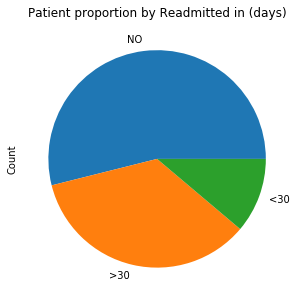

In [13]:
plot = df_readmit.Count.plot.pie(y="Race", figsize=(5, 5), title="Patient proportion by Readmitted in (days)")

In [14]:
df_race = generate_val_cnts(first_enc_df.race, "Race")
df_race
# df_race.to_clipboard()

,Count,Proportion
Race,,
Caucasian,53491,74.79%
AfricanAmerican,12887,18.02%
?,1948,2.72%
Hispanic,1517,2.12%
Other,1178,1.65%
Asian,497,0.69%


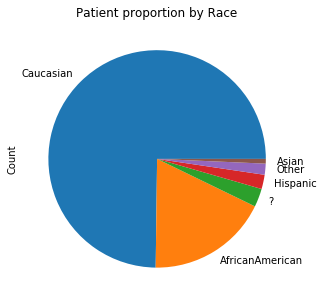

In [15]:
plot = df_race.Count.plot.pie(y="Race", figsize=(5, 5), title="Patient proportion by Race")

In [16]:
df_gender = generate_val_cnts(first_enc_df.gender, "Gender")
df_gender
# df_gender.to_clipboard()

,Count,Proportion
Gender,,
Female,38025,53.17%
Male,33490,46.83%
Unknown/Invalid,3,0.00%


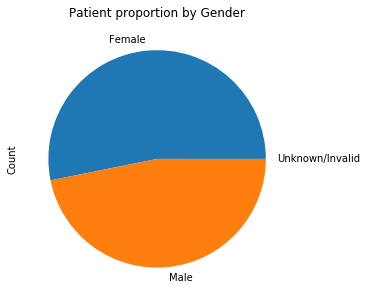

In [17]:
plot = df_gender.Count.plot.pie(y="Gender", figsize=(5, 5), title="Patient proportion by Gender")

In [18]:
df_age = generate_val_cnts(first_enc_df.age, "Age")
df_age.sort_values(by="Age")
# df_age.to_clipboard()

,Count,Proportion
Age,,
[0-10),154,0.22%
[10-20),535,0.75%
[20-30),1127,1.58%
[30-40),2699,3.77%
[40-50),6878,9.62%
[50-60),12466,17.43%
[60-70),15960,22.32%
[70-80),18210,25.46%
[80-90),11589,16.20%


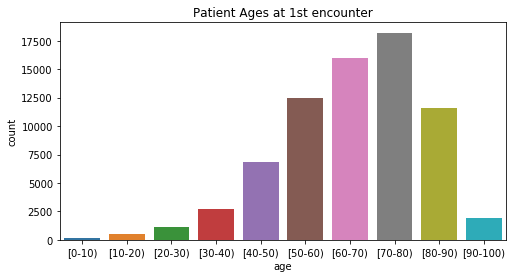

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(ax=ax, x="age", data=first_enc_df, order=sorted(first_enc_df.age.unique()))
ax.set_title("Patient Ages at 1st encounter")
plt.show()

**This chart and plot displays the distribution of how many encounters each patient over the 10 year time-span of this dataset.  For example, over these 10 years 76.55% of the patients had only once hospital encounter.**

In [20]:
df_total_encounters = generate_val_cnts(first_enc_df.total_encounters, "Total Hospital Encounters by Persons in Dataset")
df_total_encounters[:10]

,Count,Proportion
Total Hospital Encounters by Persons in Dataset,,
1,54745,76.55%
2,10434,14.59%
3,3328,4.65%
4,1421,1.99%
5,717,1.00%
6,346,0.48%
7,207,0.29%
8,111,0.16%
9,70,0.10%


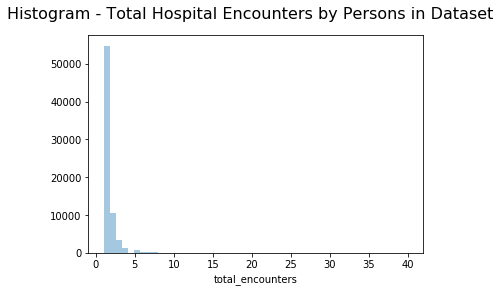

In [21]:
fig, ax = plt.subplots()

sns.distplot(first_enc_df.total_encounters, ax=ax, kde=False)
fig.suptitle('Histogram - Total Hospital Encounters by Persons in Dataset', fontsize=16)

plt.show()

## The following group of 8 histograms displays the distribution of the 8 continuous numeric features in the dataset

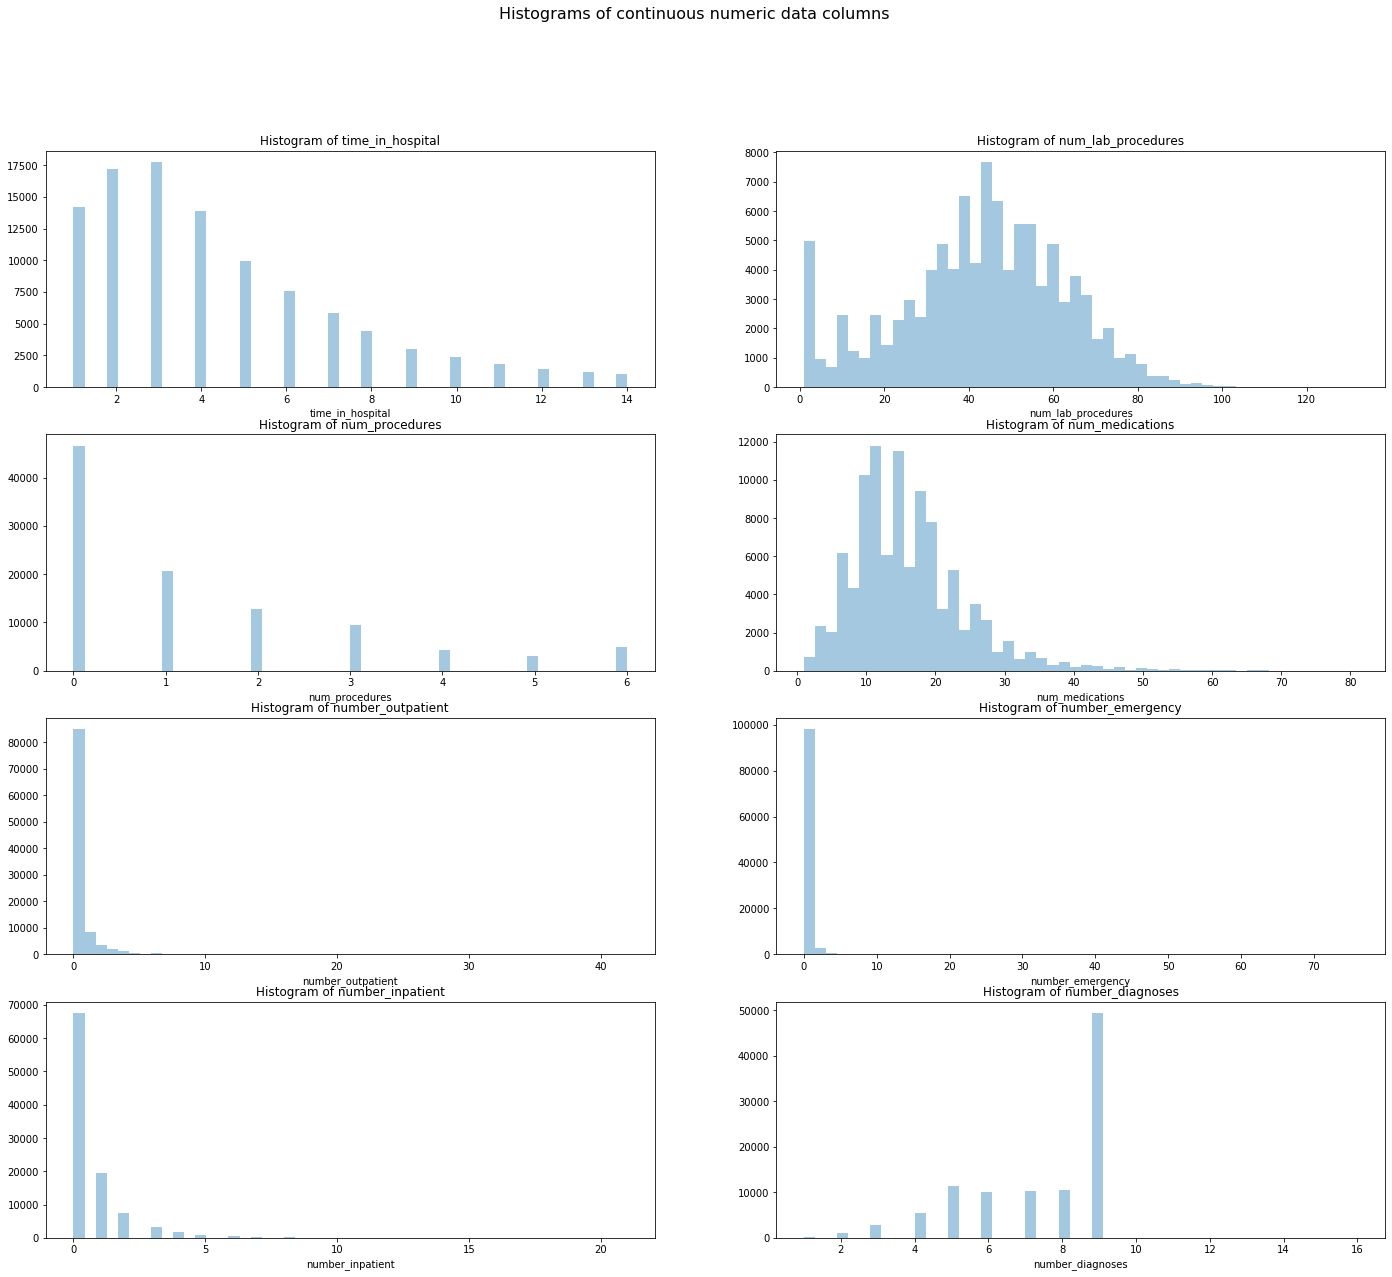

In [22]:
fig, axs = plt.subplots(4, 2, figsize=(24, 20))

for ax, col in zip(axs.flatten(), continuous_cols[:9]):
    sns.distplot(df[col], ax=ax, kde=False)
    ax.set_title(str("Histogram of " + col))
    
fig.suptitle('Histograms of continuous numeric data columns', fontsize=16)

plt.show()

**The following chart and plots show the averages for the readmitted and non-readmitted class of each of the continuous features**

In [23]:
comp_df = df.groupby("readmitted_less_30")[continuous_cols].mean()
comp_df.index = comp_df.index.map({0: "No", 1: "Yes"})
comp_df

ATTRIBUTE NAME,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,imputed_age
readmitted_less_30,,,,,,,,,
No,4.349224,42.953644,1.347123,15.911137,0.360871,0.177803,0.561648,7.388667,65.867392
Yes,4.768249,44.226028,1.280884,16.903143,0.436911,0.357313,1.224003,7.692789,66.760148


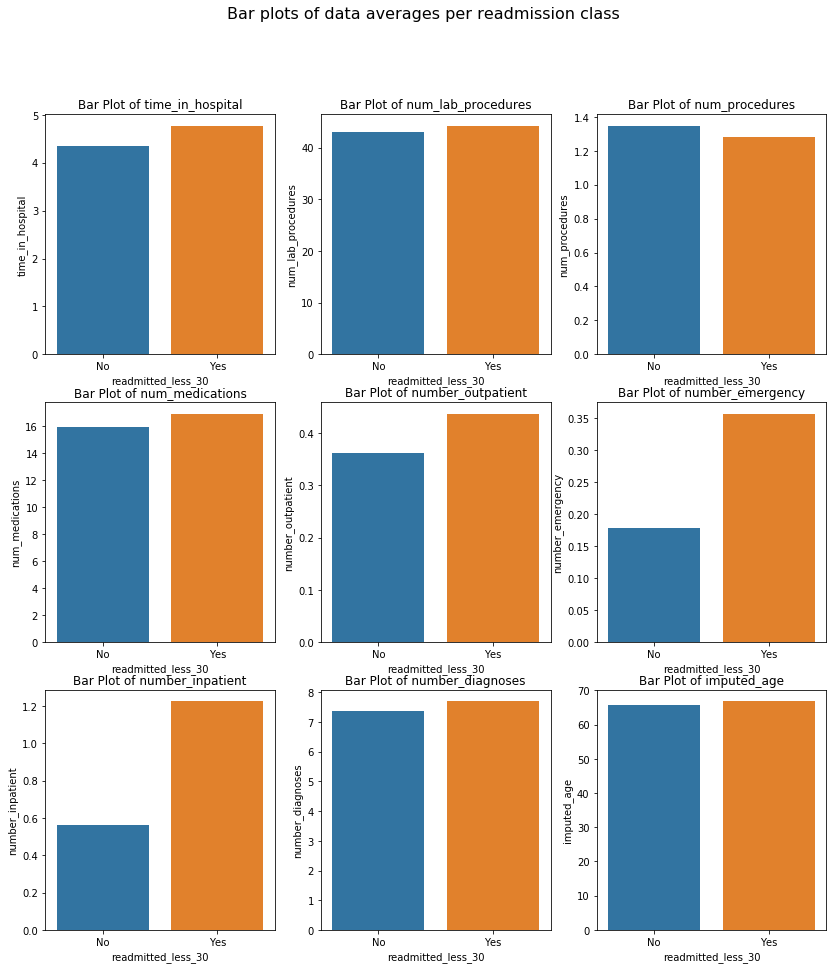

In [24]:
fig, axs = plt.subplots(3, 3, figsize=(14, 15))

for ax, col in zip(axs.flatten(), comp_df.columns):
    sns.barplot(x=comp_df.index, y=col, ax=ax, data=comp_df)

    ax.set_title(str("Bar Plot of " + col))

fig.suptitle("Bar plots of data averages per readmission class", fontsize=16)

plt.show()

In [25]:
def gen_prop_df(col, df):
    temp_df = df.groupby(col).readmitted_less_30.sum() / df.groupby(col).readmitted_less_30.size()
    return temp_df.to_frame("Percentage readmitted within 30 days by feature value") * 100

**This next group of plots looks at categorical data.  For each categorical feature, it shows the average % readamitted for each value of the category**

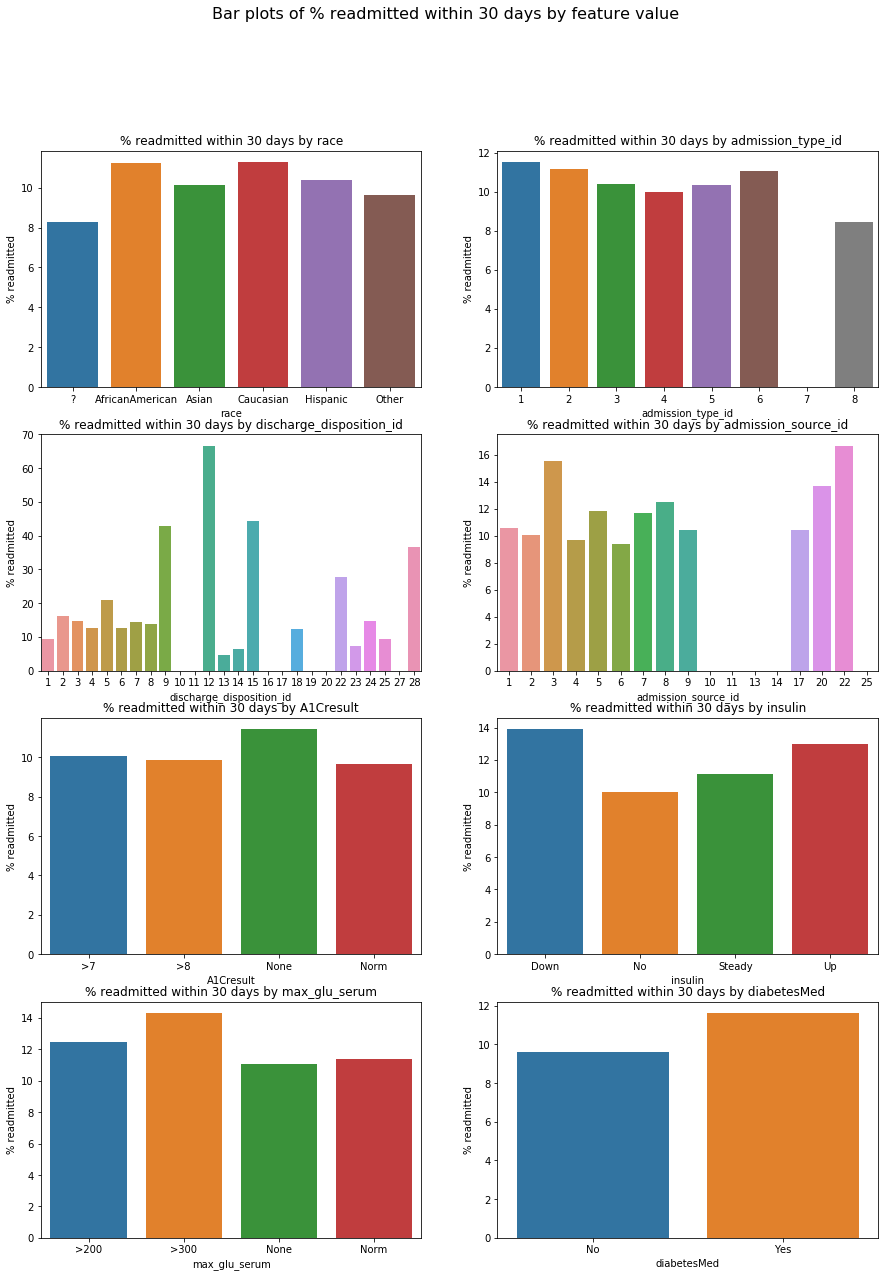

In [26]:
cols_to_test = ["race", "admission_type_id", "discharge_disposition_id", "admission_source_id", "A1Cresult", "insulin", "max_glu_serum", "diabetesMed"]


fig, axs = plt.subplots(4, 2, figsize=(15, 20))

for ax, col in zip(axs.flatten(), cols_to_test):

    temp_df = gen_prop_df(col, df)

    sns.barplot(x=temp_df.index, y=temp_df.columns[0], ax=ax, data=temp_df)

    ax.set_ylabel('% readmitted')
    ax.set_title(str("% readmitted within 30 days by " + col))
    

fig.suptitle("Bar plots of % readmitted within 30 days by feature value", fontsize=16)

plt.show()

**The following plot just isolates whether the A1C was tested or not and shows percentages readmitted by those feature values**

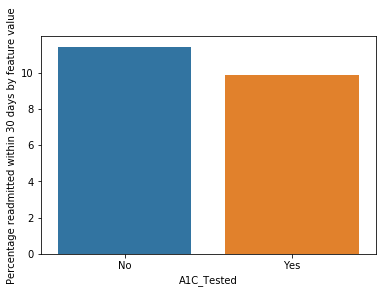

,Percentage readmitted within 30 days by feature value
A1C_Tested,
No,11.423278
Yes,9.848396


In [27]:
df["A1C_Tested"] = df.A1Cresult.map({"Norm": "Yes", ">7": "Yes", ">8": "Yes", "None": "No"})
temp_df = gen_prop_df("A1C_Tested", df)

sns.barplot(x=temp_df.index, y=temp_df.columns[0], data=temp_df)
plt.show()
temp_df